In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# EDA

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

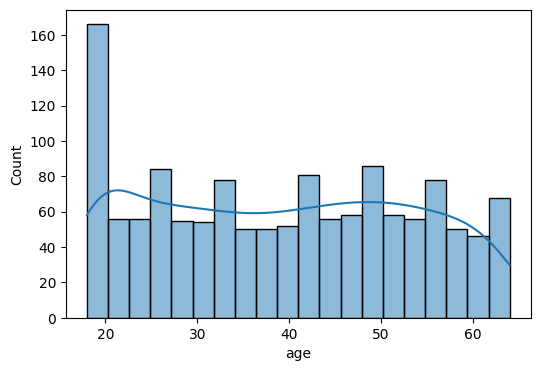

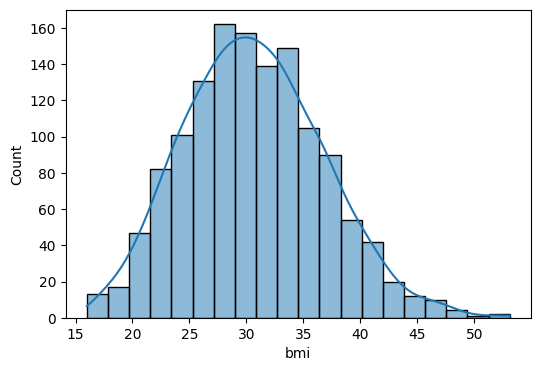

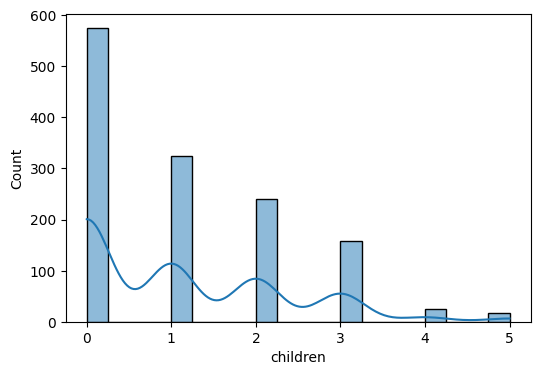

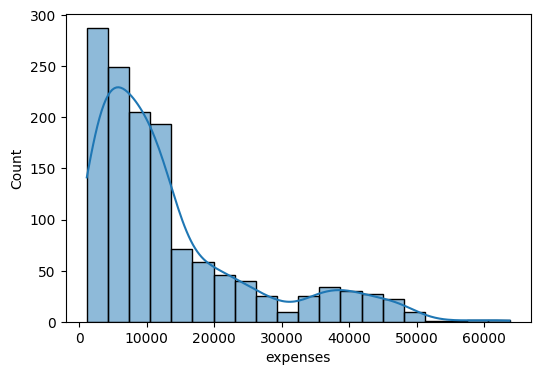

In [11]:
numeric_columns=['age', 'bmi', 'children', 'expenses']
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

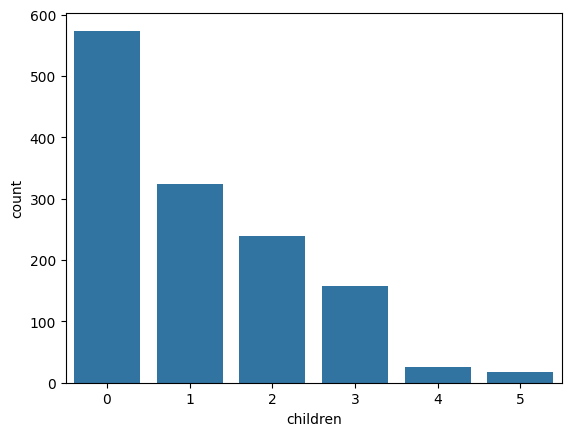

In [12]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

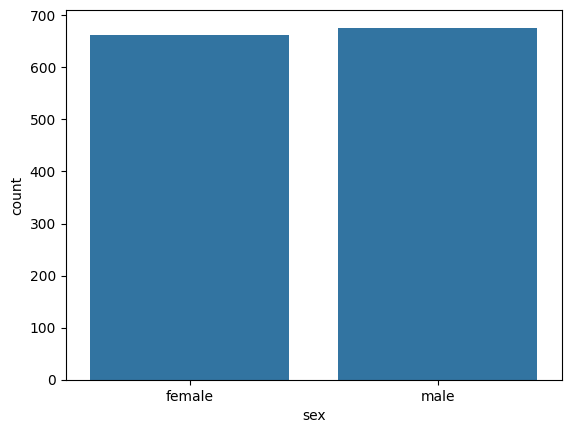

In [13]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

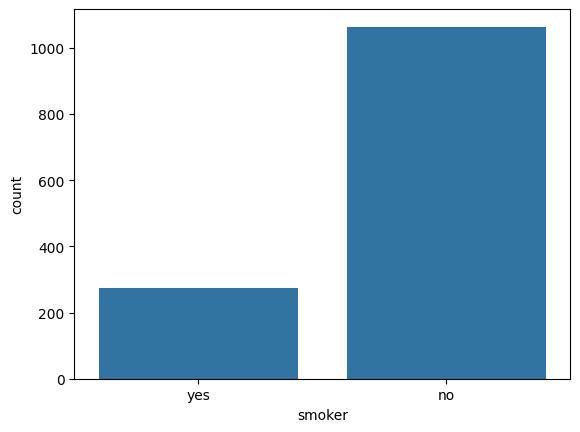

In [14]:
sns.countplot(x=df['smoker'])

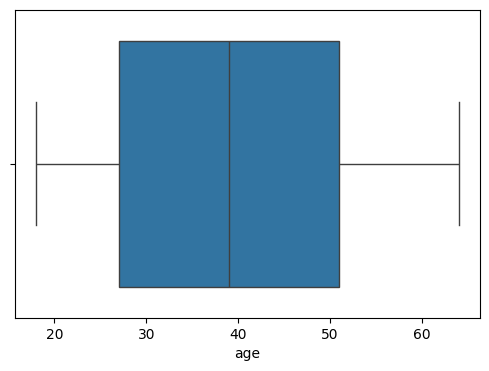

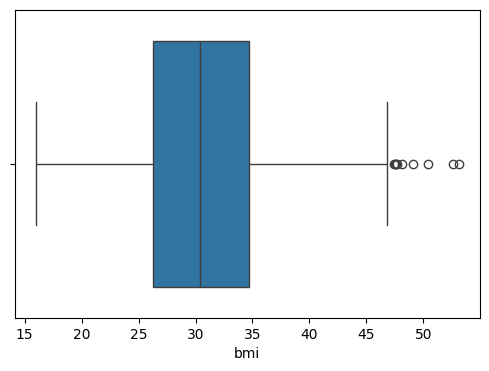

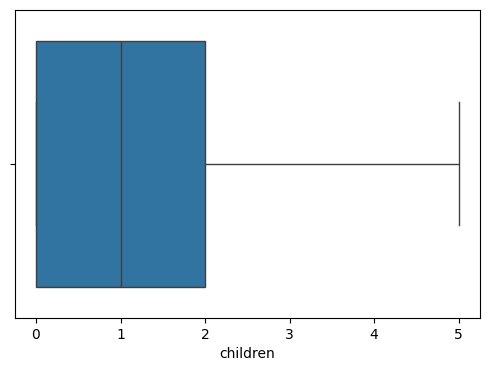

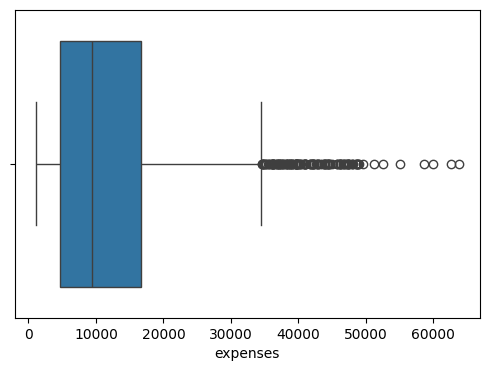

In [15]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])

<Axes: >

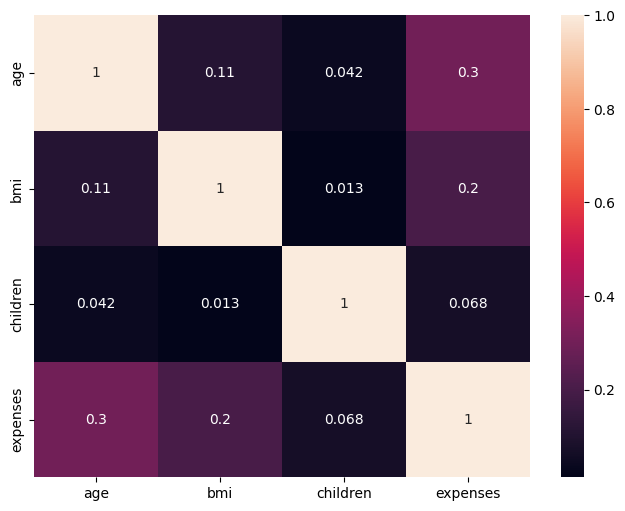

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data Cleaning and Preprocessing

In [17]:
df_cleaned=df.copy()

In [18]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
df_cleaned.shape

(1338, 7)

In [20]:
df_cleaned.drop_duplicates(inplace=True)

In [21]:
df_cleaned.shape

(1337, 7)

In [22]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [23]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


In [24]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [25]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})

In [26]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86


In [27]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [28]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

In [29]:
df_cleaned

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,northwest,10600.55
1334,18,1,31.9,0,0,northeast,2205.98
1335,18,1,36.9,0,0,southeast,1629.83
1336,21,1,25.8,0,0,southwest,2007.95


In [30]:
df_cleaned.rename(columns={
    'sex':'is_female','smoker':'is_smoker'
},inplace=True)

In [31]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [32]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [33]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,True
1,18,0,33.8,1,0,1725.55,False,True,False
2,28,0,33.0,3,0,4449.46,False,True,False
3,33,0,22.7,0,0,21984.47,True,False,False
4,32,0,28.9,0,0,3866.86,True,False,False


In [34]:
df_cleaned=df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,31,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


#Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

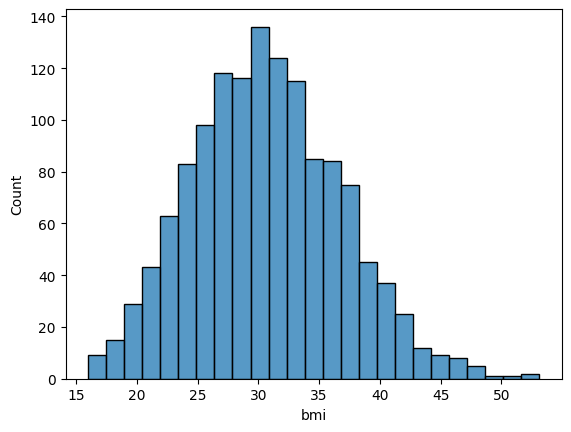

In [35]:
sns.histplot(df['bmi'])

In [36]:
df_cleaned['bmi_category']=pd.cut(df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,100],labels=['underweight','normal','overweight','obese'])

In [37]:
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,overweight


In [38]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned=df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()

In [40]:
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [41]:
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.524321,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.457496,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.457496,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.342502,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.360685,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.130224,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.130224,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.948405,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.851594,-0.909234,0,2007,0,0,1,0,1,0


In [42]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'expenses',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [45]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['expenses'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200347
1,bmi,0.197714
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_normal,-0.104283


In [46]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

In [47]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['expenses_bin'] = pd.qcut(df_cleaned['expenses'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['expenses_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_overweight,4.873307,0.181313,Accept Null (Drop Feature)
bmi_category_normal,4.231793,0.237498,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [48]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'expenses','region_southeast','bmi_category_obese']]

In [50]:
final_df

,age,is_female,bmi,children,is_smoker,expenses,region_southeast,bmi_category_obese
0,-1.440418,1,-0.524321,-0.909234,1,16884,0,0
1,-1.511647,0,0.457496,-0.079442,0,1725,1,1
2,-0.799350,0,0.457496,1.580143,0,4449,1,1
3,-0.443201,0,-1.342502,-0.909234,0,21984,0,0
4,-0.514431,0,-0.360685,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.130224,1.580143,0,10600,0,1
1334,-1.511647,1,0.130224,-0.909234,0,2205,0,1
1335,-1.511647,1,0.948405,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.851594,-0.909234,0,2007,0,0


In [51]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
